In [697]:
from sklearn.datasets import load_iris

In [698]:
iris = load_iris()

In [699]:
X=iris.data
Y=iris.target

In [355]:
print X,Y

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [11]:
import sklearn
?sklearn.datasets

In [356]:
x=X[:,2:4]

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

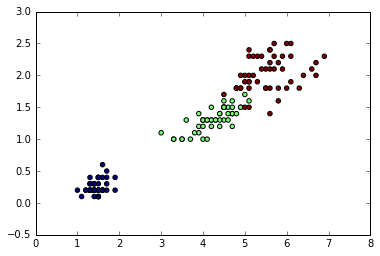

In [45]:
plt.scatter(x[:,0],x[:,1],c=Y[:])

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [351]:
def gaus(x1,y1):
    return np.exp(((x1-y1)**2/2).sum() )

In [352]:
knn=KNeighborsClassifier(n_neighbors=4,metric=gaus,p=4)
knn.fit(x,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function gaus at 0x000000000D8DE128>,
           metric_params=None, n_jobs=1, n_neighbors=4, p=4,
           weights='uniform')

In [283]:
 np.abs((knn.predict(x)-Y)).sum()

4

In [348]:
from matplotlib.colors import ListedColormap
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, .05))
Z=knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

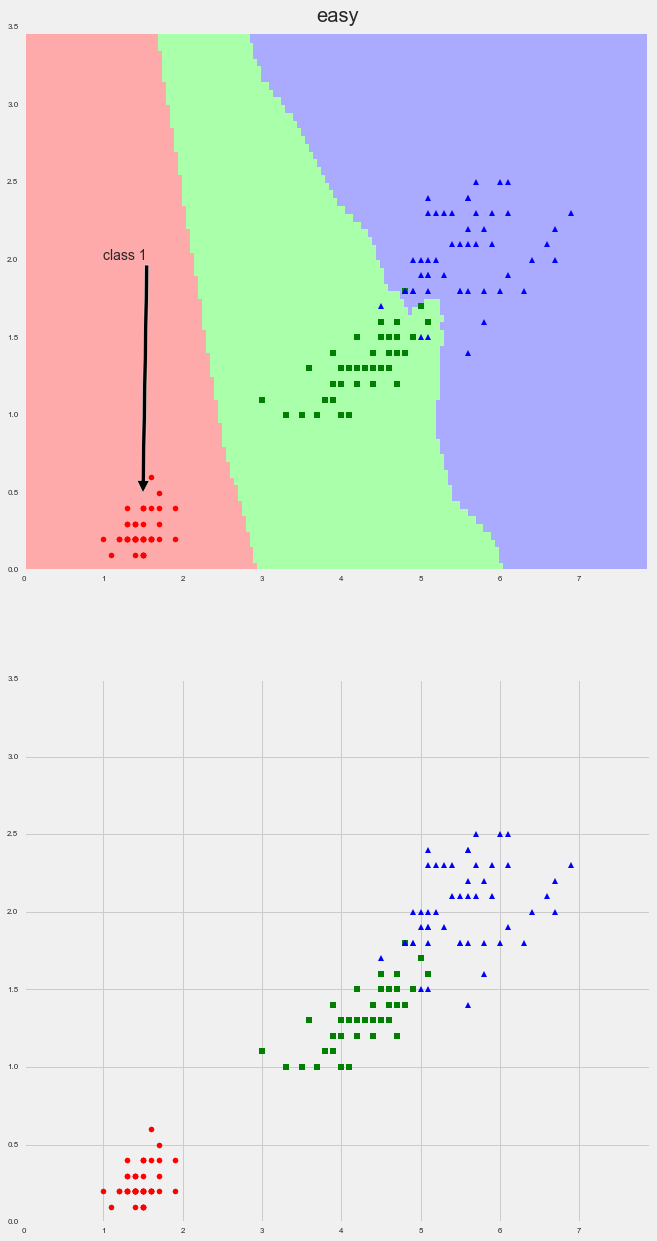

In [350]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(1,figsize=(10,20))
plt.subplot(211)
plt.title('easy')
plt.axis([0,x_max,0,y_max])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light);
plt.plot(x[:50,0],x[:50,1],'ro',x[50:100,0],x[50:100,1],'gs',x[100:150,0],x[100:150,1],'b^');
plt.annotate('class 1', xy=(1.5, 0.5), xytext=(1, 2),
            arrowprops=dict(facecolor='black'),
            )

plt.subplot(212)
plt.axis([0,x_max,0,y_max])
plt.grid(True)
plt.plot(x[:50,0],x[:50,1],'ro',x[50:100,0],x[50:100,1],'gs',x[100:150,0],x[100:150,1],'b^');
plt.show()


In [341]:
from sklearn.linear_model import LogisticRegression

In [410]:
clf=LogisticRegression()
clf.fit(x,Y)
nn=KNeighborsClassifier(n_neighbors=2)
nn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [364]:
 np.abs((clf.predict(x)-Y)).sum()

19

In [411]:
from sklearn import metrics
print metrics.accuracy_score(Y,nn.predict(X))
print metrics.accuracy_score(Y,clf.predict(x))

0.98
0.873333333333


In [478]:
print X.shape,Y.shape

(150L, 4L) (150L,)


In [577]:
from sklearn.cross_validation import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(X,Y,test_size=0.4)

In [556]:
print xTrain.shape,xTest.shape

(90L, 4L) (60L, 4L)


In [557]:
logreg=LogisticRegression(C=0.1)
logreg.fit(xTrain,yTrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [558]:
metrics.accuracy_score(yTest,logreg.predict(xTest))

0.83333333333333337

In [561]:
def knnn(k):
    return KNeighborsClassifier(n_neighbors=k)

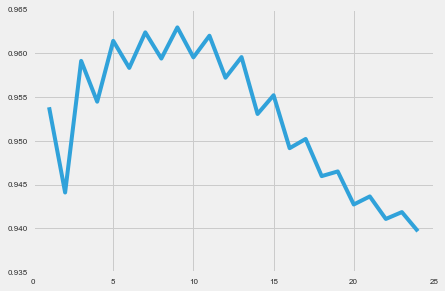

In [654]:
scores=np.array([])
for j in xrange(1,1000):
    xTrain,xTest,yTrain,yTest=train_test_split(X,Y,test_size=0.4)
    for i in xrange (1,25):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(xTrain,yTrain)
        scores=np.append(scores,metrics.accuracy_score(yTest,knn.predict(xTest)))
sc=scores.reshape((999,24)).mean(axis=0, keepdims=True).reshape(24,)
plt.plot(np.arange(1,25),sc)

In [655]:
sc.argmax()

8

In [656]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [693]:
knn=KNeighborsClassifier(n_neighbors=5)
score=cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
print score
print score.mean()

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


In [695]:
score=np.array([])
for k in xrange(1,31):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=np.append(score,cross_val_score(knn,X,Y,cv=10,scoring='accuracy').mean())
print score

[ 0.96        0.95333333  0.96666667  0.96666667  0.96666667  0.96666667
  0.96666667  0.96666667  0.97333333  0.96666667  0.96666667  0.97333333
  0.98        0.97333333  0.97333333  0.97333333  0.97333333  0.98
  0.97333333  0.98        0.96666667  0.96666667  0.97333333  0.96
  0.96666667  0.96        0.96666667  0.95333333  0.95333333  0.95333333]


In [689]:
sc=score.reshape(10,30).mean(axis=0, keepdims=True).reshape(30,)

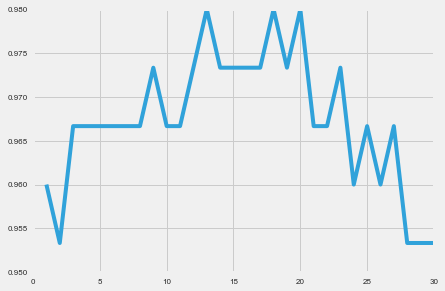

In [696]:
plt.plot(np.arange(1,31),score)

In [709]:
from sklearn.linear_model import LogisticRegression
cval=10**np.array([-4.,-3,-2,-1,0,1,2,3,4,5,6,7,8])
score=[]
for c in cval:
    linreg=LogisticRegression(C=c)
    score.append(cross_val_score(linreg,X,Y,cv=10,scoring='accuracy').mean())

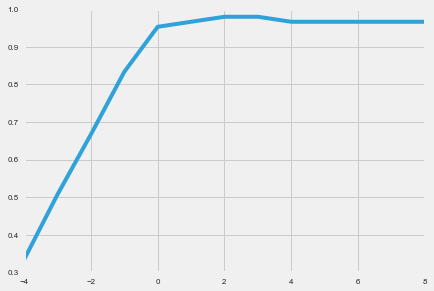

In [734]:
plt.plot(np.arange(-4,9),np.array(score))